Here's what we'll scrape:

https://www.stthomas.edu/covid19/dashboard/historical/index.html

Some BeautifulSoup doc:

https://www.crummy.com/software/BeautifulSoup/bs4/doc/

# 1. Identifying the URL structure

In [2]:
import requests
url = 'https://www.stthomas.edu/covid19/dashboard/historical/index.html'
response = requests.get(url)
print (len(response.text))
print(response.text) #[:5000])

169746
<!DOCTYPE html>
<html lang="en" xml:lang="en">
    <head>
        <meta content="noindex, nofollow" name="robots"/>
        
    <meta charset="utf-8"/>
    <meta content="IE=edge" http-equiv="X-UA-Compatible"/>
    <meta content="width=device-width,initial-scale=1.0" name="viewport"/>
    <link href="../../../_files/images/favicons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>
    <link href="../../../_files/images/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>
    <link href="../../../_files/images/favicons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>
    <link href="../../../_files/images/favicons/site.webmanifest" rel="manifest"/>
    <link color="#510c76" href="../../../_files/images/favicons/safari-pinned-tab.svg" rel="mask-icon"/>
    <meta content="#da532c" name="msapplication-TileColor"/>
    <meta content="#ffffff" name="theme-color"/>
    <meta content="width=device-width, initial-scale=1.0" name="viewport"/>

# 2.	Using BeautifulSoup to parse the HTML content

In [3]:
import bs4
from bs4 import BeautifulSoup
html_soup = BeautifulSoup(response.text, 'html.parser')
print(type(html_soup))

<class 'bs4.BeautifulSoup'>


In [4]:
html_soup.prettify(formatter='html') # not so pretty, is it?

'<!DOCTYPE html>\n<html lang="en" xml:lang="en">\n <head>\n  <meta content="noindex, nofollow" name="robots"/>\n  <meta charset="utf-8"/>\n  <meta content="IE=edge" http-equiv="X-UA-Compatible"/>\n  <meta content="width=device-width,initial-scale=1.0" name="viewport"/>\n  <link href="../../../_files/images/favicons/apple-touch-icon.png" rel="apple-touch-icon" sizes="180x180"/>\n  <link href="../../../_files/images/favicons/favicon-32x32.png" rel="icon" sizes="32x32" type="image/png"/>\n  <link href="../../../_files/images/favicons/favicon-16x16.png" rel="icon" sizes="16x16" type="image/png"/>\n  <link href="../../../_files/images/favicons/site.webmanifest" rel="manifest"/>\n  <link color="#510c76" href="../../../_files/images/favicons/safari-pinned-tab.svg" rel="mask-icon"/>\n  <meta content="#da532c" name="msapplication-TileColor"/>\n  <meta content="#ffffff" name="theme-color"/>\n  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>\n  <meta content="#8348ad" name

# 3. Looking at \<thead\> elements

In [5]:
thead_container = html_soup.find_all('thead') #, class_ = 'main_body')
thead_container # list of Tags

[<thead>
 <tr>
 <th scope="col">WEEK OF	</th>
 <th scope="col">Total Positive</th>
 <th scope="col">Employee Positive</th>
 <th scope="col">Student Positive</th>
 <th scope="col">Primary Campus  (Minneapolis)</th>
 <th scope="col">Primary Campus  (St. Paul)</th>
 </tr>
 </thead>]

# 4. Looking at \<tbody\>  elements

In [6]:
tbody_container = html_soup.find_all('tbody') #, class_ = 'main_body')
print(type(tbody_container[0]))
tbody_container # list of Tags

<class 'bs4.element.Tag'>


[<tbody>
 <tr>
 <th data-label="WEEK OF " scope="row" valign="top">Historical Apr. - Aug. 28</th>
 <td data-label="Total Positive" valign="top"><p>26*</p></td>
 <td data-label="Employee Positive" valign="top"><p>0* </p></td>
 <td data-label="Student Positive" valign="top"><p>26*</p></td>
 <td data-label="Primary Campus  (Minneapolis)" valign="top"><p>Not Available**</p></td>
 <td data-label="Primary Campus  (St. Paul)" valign="top">Not Available**</td>
 </tr>
 <tr>
 <th data-label="WEEK OF " scope="row" valign="top"><p>Aug. 29 - Sept. 4</p></th>
 <td data-label="Total Positive" valign="top"><p>17</p></td>
 <td data-label="Employee Positive" valign="top"><p>1</p></td>
 <td data-label="Student Positive" valign="top"><p>16</p></td>
 <td data-label="Primary Campus  (Minneapolis)" valign="top">0</td>
 <td data-label="Primary Campus  (St. Paul)" valign="top"><p>17</p></td>
 </tr>
 <tr>
 <th data-label="WEEK OF " scope="row" valign="top"><p>Sept. 5 - 11</p></th>
 <td data-label="Total Positiv

# 5. Looking at all \<tr\> elements

In [7]:
tr_list=html_soup.find_all('tr')
tr_list # list of Tags

[<tr>
 <th scope="col">WEEK OF	</th>
 <th scope="col">Total Positive</th>
 <th scope="col">Employee Positive</th>
 <th scope="col">Student Positive</th>
 <th scope="col">Primary Campus  (Minneapolis)</th>
 <th scope="col">Primary Campus  (St. Paul)</th>
 </tr>,
 <tr>
 <th data-label="WEEK OF " scope="row" valign="top">Historical Apr. - Aug. 28</th>
 <td data-label="Total Positive" valign="top"><p>26*</p></td>
 <td data-label="Employee Positive" valign="top"><p>0* </p></td>
 <td data-label="Student Positive" valign="top"><p>26*</p></td>
 <td data-label="Primary Campus  (Minneapolis)" valign="top"><p>Not Available**</p></td>
 <td data-label="Primary Campus  (St. Paul)" valign="top">Not Available**</td>
 </tr>,
 <tr>
 <th data-label="WEEK OF " scope="row" valign="top"><p>Aug. 29 - Sept. 4</p></th>
 <td data-label="Total Positive" valign="top"><p>17</p></td>
 <td data-label="Employee Positive" valign="top"><p>1</p></td>
 <td data-label="Student Positive" valign="top"><p>16</p></td>
 <td da

# 6. Looking at all \<td\> elements

In [8]:
td_list=html_soup.find_all('td')
td_list # list of Tags

[<td data-label="Total Positive" valign="top"><p>26*</p></td>,
 <td data-label="Employee Positive" valign="top"><p>0* </p></td>,
 <td data-label="Student Positive" valign="top"><p>26*</p></td>,
 <td data-label="Primary Campus  (Minneapolis)" valign="top"><p>Not Available**</p></td>,
 <td data-label="Primary Campus  (St. Paul)" valign="top">Not Available**</td>,
 <td data-label="Total Positive" valign="top"><p>17</p></td>,
 <td data-label="Employee Positive" valign="top"><p>1</p></td>,
 <td data-label="Student Positive" valign="top"><p>16</p></td>,
 <td data-label="Primary Campus  (Minneapolis)" valign="top">0</td>,
 <td data-label="Primary Campus  (St. Paul)" valign="top"><p>17</p></td>,
 <td data-label="Total Positive" valign="top">9</td>,
 <td data-label="Employee Positive" valign="top">0</td>,
 <td data-label="Student Positive" valign="top">9</td>,
 <td data-label="Primary Campus  (Minneapolis)" valign="top">2</td>,
 <td data-label="Primary Campus  (St. Paul)" valign="top">7</td>,
 

# 6.5. Looking at all \<th\> elements (new!)

In [9]:
th_list=html_soup.find_all('th')
th_list # list of Tags

[<th scope="col">WEEK OF	</th>,
 <th scope="col">Total Positive</th>,
 <th scope="col">Employee Positive</th>,
 <th scope="col">Student Positive</th>,
 <th scope="col">Primary Campus  (Minneapolis)</th>,
 <th scope="col">Primary Campus  (St. Paul)</th>,
 <th data-label="WEEK OF " scope="row" valign="top">Historical Apr. - Aug. 28</th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Aug. 29 - Sept. 4</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Sept. 5 - 11</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Sept. 12 - 18</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Sept. 19 - 25</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Sept. 26 - Oct. 2</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Oct. 3 - Oct. 9</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Oct. 10 - Oct. 16</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Oct. 17 - Oct. 23</p></th>,
 <th data-lab

# 7. Iterating over the *text* of  \<td\>  elements

In [10]:
for row in td_list:
    # print(row.contents)
    print(row.text)
type(row)

26*
0* 
26*
Not Available**
Not Available**
17
1
16
0
17
9
0
9
2
7
36
3
33
2
34
56
0
56
4
52
51
1 
50
2
49
36
2
34
0
36
18
1
17
0
18
17
2
15
2
15
22
4
18
3
19
80
2
78
2
78
127
15
112
11
116
103
12
91
9
94
57
10
47
3
54
47
5
42
3
44
58
2
56
4
54
35
3
32
4
31
29
2
27
1
28
14
1
13
2
12
35
3
32
1
34
17
3
14
6
11
13
3
10
4
9
9
4
5
2
7
19
5
14
1
18
9
3
6
1
8
1
0
1
0
1
5
2
3
1
4
9
1
8
3
6
15
5
10
1
14
17
0
17
2
15
17
12
5
4
13
29
4
25
1
28


bs4.element.Tag

# 8. Looking at first \<tr\> element: the column headers

In [11]:
tr_first = html_soup.find('tr')
tr_first

<tr>
<th scope="col">WEEK OF	</th>
<th scope="col">Total Positive</th>
<th scope="col">Employee Positive</th>
<th scope="col">Student Positive</th>
<th scope="col">Primary Campus  (Minneapolis)</th>
<th scope="col">Primary Campus  (St. Paul)</th>
</tr>

In [12]:
tr_first.text # get all the text within <tr>

'\nWEEK OF\t\nTotal Positive\nEmployee Positive\nStudent Positive\nPrimary Campus  (Minneapolis)\nPrimary Campus  (St. Paul)\n'

In [13]:
tr_first.text.split('\n') # split on newlines

['',
 'WEEK OF\t',
 'Total Positive',
 'Employee Positive',
 'Student Positive',
 'Primary Campus  (Minneapolis)',
 'Primary Campus  (St. Paul)',
 '']

# 9. Looking at slices of all \<tr\>  elements: rows of data

In [14]:
td_list[0::5] # slice giving 'Total Positive' values

[<td data-label="Total Positive" valign="top"><p>26*</p></td>,
 <td data-label="Total Positive" valign="top"><p>17</p></td>,
 <td data-label="Total Positive" valign="top">9</td>,
 <td data-label="Total Positive" valign="top">36</td>,
 <td data-label="Total Positive" valign="top"><p>56</p></td>,
 <td data-label="Total Positive" valign="top">51</td>,
 <td data-label="Total Positive" valign="top"><p>36</p></td>,
 <td data-label="Total Positive" valign="top"><p>18</p></td>,
 <td data-label="Total Positive" valign="top"><p>17</p></td>,
 <td data-label="Total Positive" valign="top"><p>22</p></td>,
 <td data-label="Total Positive" valign="top"><p>80</p></td>,
 <td data-label="Total Positive" valign="top"><p>127</p></td>,
 <td data-label="Total Positive" valign="top"><p>103</p></td>,
 <td data-label="Total Positive" valign="top"><p>57</p></td>,
 <td data-label="Total Positive" valign="top"><p>47</p></td>,
 <td data-label="Total Positive" valign="top"><p>58</p></td>,
 <td data-label="Total Posi

In [15]:
td_list[1::5] # 'Employee Positive' count

[<td data-label="Employee Positive" valign="top"><p>0* </p></td>,
 <td data-label="Employee Positive" valign="top"><p>1</p></td>,
 <td data-label="Employee Positive" valign="top">0</td>,
 <td data-label="Employee Positive" valign="top">3</td>,
 <td data-label="Employee Positive" valign="top">0</td>,
 <td data-label="Employee Positive" valign="top"><p>1 </p></td>,
 <td data-label="Employee Positive" valign="top"><p>2</p></td>,
 <td data-label="Employee Positive" valign="top"><p>1</p></td>,
 <td data-label="Employee Positive" valign="top"><p>2</p></td>,
 <td data-label="Employee Positive" valign="top"><p>4</p></td>,
 <td data-label="Employee Positive" valign="top"><p>2</p></td>,
 <td data-label="Employee Positive" valign="top">15</td>,
 <td data-label="Employee Positive" valign="top">12</td>,
 <td data-label="Employee Positive" valign="top"><p>10</p></td>,
 <td data-label="Employee Positive" valign="top"><p>5</p></td>,
 <td data-label="Employee Positive" valign="top"><p>2</p></td>,
 <td 

In [16]:
td_list[2::5] # 'Student Positive' count

[<td data-label="Student Positive" valign="top"><p>26*</p></td>,
 <td data-label="Student Positive" valign="top"><p>16</p></td>,
 <td data-label="Student Positive" valign="top">9</td>,
 <td data-label="Student Positive" valign="top">33</td>,
 <td data-label="Student Positive" valign="top">56</td>,
 <td data-label="Student Positive" valign="top"><p>50</p></td>,
 <td data-label="Student Positive" valign="top"><p>34</p></td>,
 <td data-label="Student Positive" valign="top"><p>17</p></td>,
 <td data-label="Student Positive" valign="top"><p>15</p></td>,
 <td data-label="Student Positive" valign="top"><p>18</p></td>,
 <td data-label="Student Positive" valign="top"><p>78</p></td>,
 <td data-label="Student Positive" valign="top">112</td>,
 <td data-label="Student Positive" valign="top"><p>91</p></td>,
 <td data-label="Student Positive" valign="top"><p>47</p></td>,
 <td data-label="Student Positive" valign="top"><p>42</p></td>,
 <td data-label="Student Positive" valign="top"><p>56</p></td>,
 <t

In [17]:
row_count=0 # skip first row == historical summer data
for row in td_list:
    if row_count >= 1:
        print (row)
    row_count += 1
    

<td data-label="Employee Positive" valign="top"><p>0* </p></td>
<td data-label="Student Positive" valign="top"><p>26*</p></td>
<td data-label="Primary Campus  (Minneapolis)" valign="top"><p>Not Available**</p></td>
<td data-label="Primary Campus  (St. Paul)" valign="top">Not Available**</td>
<td data-label="Total Positive" valign="top"><p>17</p></td>
<td data-label="Employee Positive" valign="top"><p>1</p></td>
<td data-label="Student Positive" valign="top"><p>16</p></td>
<td data-label="Primary Campus  (Minneapolis)" valign="top">0</td>
<td data-label="Primary Campus  (St. Paul)" valign="top"><p>17</p></td>
<td data-label="Total Positive" valign="top">9</td>
<td data-label="Employee Positive" valign="top">0</td>
<td data-label="Student Positive" valign="top">9</td>
<td data-label="Primary Campus  (Minneapolis)" valign="top">2</td>
<td data-label="Primary Campus  (St. Paul)" valign="top">7</td>
<td data-label="Total Positive" valign="top">36</td>
<td data-label="Employee Positive" vali

# 10. Extract and clean lists of data from each column

In [18]:
table_data_list = td_list
table_header_list = th_list # this is NEW: they changed the website!

In [19]:
table_header_list

[<th scope="col">WEEK OF	</th>,
 <th scope="col">Total Positive</th>,
 <th scope="col">Employee Positive</th>,
 <th scope="col">Student Positive</th>,
 <th scope="col">Primary Campus  (Minneapolis)</th>,
 <th scope="col">Primary Campus  (St. Paul)</th>,
 <th data-label="WEEK OF " scope="row" valign="top">Historical Apr. - Aug. 28</th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Aug. 29 - Sept. 4</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Sept. 5 - 11</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Sept. 12 - 18</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Sept. 19 - 25</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Sept. 26 - Oct. 2</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Oct. 3 - Oct. 9</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Oct. 10 - Oct. 16</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Oct. 17 - Oct. 23</p></th>,
 <th data-lab

In [20]:
##### Lists to store the scraped data in
dates = []
total_positive = []
emp_positive = []
stu_positive = []
mpls_positive = []
stp_positive = []

dates = [elt for elt in table_header_list[6:]] # NEW! skip over first 6 elements
total_positive = [elt for elt in table_data_list[0::5]]
emp_positive = [elt for elt in table_data_list[1::5]]
stu_positive = [elt for elt in table_data_list[2::5]]
mpls_positive = [elt for elt in table_data_list[3::5]]
stp_positive = [elt for elt in table_data_list[4::5]]


In [21]:
dates

[<th data-label="WEEK OF " scope="row" valign="top">Historical Apr. - Aug. 28</th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Aug. 29 - Sept. 4</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Sept. 5 - 11</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Sept. 12 - 18</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Sept. 19 - 25</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Sept. 26 - Oct. 2</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Oct. 3 - Oct. 9</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Oct. 10 - Oct. 16</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Oct. 17 - Oct. 23</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Oct. 24 - Oct. 30</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Oct. 31 - Nov. 6</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Nov. 7 - Nov 13</p></th>,
 <th data-label="WEEK

In [22]:
dates[1:] # skip 'Historical' (pre-fall) data
trim_dates = dates[1:]
trim_dates

[<th data-label="WEEK OF " scope="row" valign="top"><p>Aug. 29 - Sept. 4</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Sept. 5 - 11</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Sept. 12 - 18</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Sept. 19 - 25</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Sept. 26 - Oct. 2</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Oct. 3 - Oct. 9</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Oct. 10 - Oct. 16</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Oct. 17 - Oct. 23</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Oct. 24 - Oct. 30</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Oct. 31 - Nov. 6</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Nov. 7 - Nov 13</p></th>,
 <th data-label="WEEK OF " scope="row" valign="top"><p>Nov. 14 - Nov. 20</p></th>,
 <th data-label="WEEK 

In [23]:
emp_positive[1:] # raw Employee Positive data (skip summer)

[<td data-label="Employee Positive" valign="top"><p>1</p></td>,
 <td data-label="Employee Positive" valign="top">0</td>,
 <td data-label="Employee Positive" valign="top">3</td>,
 <td data-label="Employee Positive" valign="top">0</td>,
 <td data-label="Employee Positive" valign="top"><p>1 </p></td>,
 <td data-label="Employee Positive" valign="top"><p>2</p></td>,
 <td data-label="Employee Positive" valign="top"><p>1</p></td>,
 <td data-label="Employee Positive" valign="top"><p>2</p></td>,
 <td data-label="Employee Positive" valign="top"><p>4</p></td>,
 <td data-label="Employee Positive" valign="top"><p>2</p></td>,
 <td data-label="Employee Positive" valign="top">15</td>,
 <td data-label="Employee Positive" valign="top">12</td>,
 <td data-label="Employee Positive" valign="top"><p>10</p></td>,
 <td data-label="Employee Positive" valign="top"><p>5</p></td>,
 <td data-label="Employee Positive" valign="top"><p>2</p></td>,
 <td data-label="Employee Positive" valign="top"><p>3</p></td>,
 <td da

In [24]:
int_emp_positive = [int(elt.text) for elt in emp_positive[1:]] # intify Employee Positive values
int_emp_positive


[1,
 0,
 3,
 0,
 1,
 2,
 1,
 2,
 4,
 2,
 15,
 12,
 10,
 5,
 2,
 3,
 2,
 1,
 3,
 3,
 3,
 4,
 5,
 3,
 0,
 2,
 1,
 5,
 0,
 12,
 4]

In [25]:
int_stu_positive = [int(elt.text) for elt in stu_positive[1:]] # intify Student Positive
int_stu_positive

[16,
 9,
 33,
 56,
 50,
 34,
 17,
 15,
 18,
 78,
 112,
 91,
 47,
 42,
 56,
 32,
 27,
 13,
 32,
 14,
 10,
 5,
 14,
 6,
 1,
 3,
 8,
 10,
 17,
 5,
 25]

In [26]:
int_total_positive = [int(elt.text) for elt in total_positive[1:]] # intify Total Positive
int_total_positive

[17,
 9,
 36,
 56,
 51,
 36,
 18,
 17,
 22,
 80,
 127,
 103,
 57,
 47,
 58,
 35,
 29,
 14,
 35,
 17,
 13,
 9,
 19,
 9,
 1,
 5,
 9,
 15,
 17,
 17,
 29]

In [27]:
int_mpls_positive = [int(elt.text) for elt in mpls_positive[1:]] # intify Mpls Positive
int_mpls_positive

[0,
 2,
 2,
 4,
 2,
 0,
 0,
 2,
 3,
 2,
 11,
 9,
 3,
 3,
 4,
 4,
 1,
 2,
 1,
 6,
 4,
 2,
 1,
 1,
 0,
 1,
 3,
 1,
 2,
 4,
 1]

In [28]:
int_stp_positive = [int(elt.text) for elt in stp_positive[1:]] # intify StP Positive
int_stp_positive

[17,
 7,
 34,
 52,
 49,
 36,
 18,
 15,
 19,
 78,
 116,
 94,
 54,
 44,
 54,
 31,
 28,
 12,
 34,
 11,
 9,
 7,
 18,
 8,
 1,
 4,
 6,
 14,
 15,
 13,
 28]

# 11. Import data into Pandas!

In [29]:
type(trim_dates[0])

bs4.element.Tag

In [30]:
trim_dates = [elt.get_text() for elt in trim_dates]
trim_dates

['Aug. 29 - Sept. 4',
 'Sept. 5 - 11',
 'Sept. 12 - 18',
 'Sept. 19 - 25',
 'Sept. 26 - Oct. 2',
 'Oct. 3 - Oct. 9',
 'Oct. 10 - Oct. 16',
 'Oct. 17 - Oct. 23',
 'Oct. 24 - Oct. 30',
 'Oct. 31 - Nov. 6',
 'Nov. 7 - Nov 13',
 'Nov. 14 - Nov. 20',
 'Nov. 21 - Nov. 27',
 'Nov. 28 - Dec. 4',
 'Dec. 5 - Dec. 11',
 'Dec. 12 - Dec. 18',
 'Dec. 19. - Jan. 1',
 'Jan. 2 - Jan. 8',
 'Jan. 9 - Jan. 15',
 'Jan. 16 - Jan. 22',
 'Jan. 23 - Jan. 29',
 'Jan. 30 - Feb. 5',
 'Feb. 6 - Feb. 12',
 'Feb. 13 - Feb. 19',
 'Feb. 20 - Feb. 26',
 'Feb. 27 - Mar. 5',
 'Mar. 6 - Mar. 12',
 'Mar. 13 - Mar. 19',
 'Mar. 20 - Mar. 26',
 'Mar. 27 - Apr. 2',
 'Apr. 3 - Apr. 9']

In [31]:
# could extract column header text for keys in input dict
import pandas as pd
covid_df = pd.DataFrame({
'Week Of' : trim_dates,
'Total Positive' : int_total_positive,
'Employee Positive': int_emp_positive,
'Student Positive': int_stu_positive,
'Minneapolis': int_mpls_positive,
'St. Paul': int_stp_positive
})
print(covid_df.info())
print('\n------\n')
covid_df


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Week Of            31 non-null     object
 1   Total Positive     31 non-null     int64 
 2   Employee Positive  31 non-null     int64 
 3   Student Positive   31 non-null     int64 
 4   Minneapolis        31 non-null     int64 
 5   St. Paul           31 non-null     int64 
dtypes: int64(5), object(1)
memory usage: 1.6+ KB
None

------



,Week Of,Total Positive,Employee Positive,Student Positive,Minneapolis,St. Paul
0,Aug. 29 - Sept. 4,17,1,16,0,17
1,Sept. 5 - 11,9,0,9,2,7
2,Sept. 12 - 18,36,3,33,2,34
3,Sept. 19 - 25,56,0,56,4,52
4,Sept. 26 - Oct. 2,51,1,50,2,49
5,Oct. 3 - Oct. 9,36,2,34,0,36
6,Oct. 10 - Oct. 16,18,1,17,0,18
7,Oct. 17 - Oct. 23,17,2,15,2,15
8,Oct. 24 - Oct. 30,22,4,18,3,19
9,Oct. 31 - Nov. 6,80,2,78,2,78


In [32]:
covid_df.to_csv('UST_COVID_table.csv') # save data as .csv file

# 12. Plot the data using Matplotlib

<AxesSubplot:>

<Figure size 432x288 with 0 Axes>

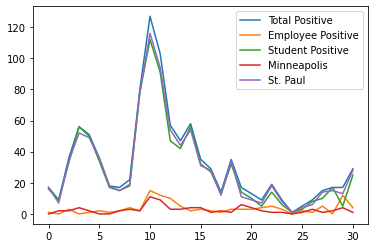

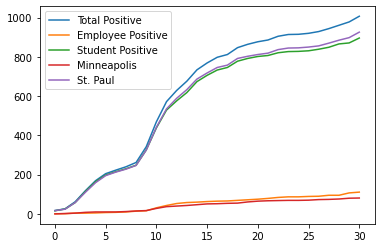

In [33]:
import matplotlib.pyplot as plt

plt.close('all')

df = covid_df.cumsum()

plt.figure();

covid_df.plot() # (kind='scatter');
df.plot()